[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%208%20-%20Delta%20Density%20Histogram.ipynb)

In [1]:
import sys
import math
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def bins_number_sturges(data_number):
    return int(math.log(data_number, 2)) + 1

def normal_distribution(x, mu, sigma):
    part1 = 1 / (sigma*np.sqrt(2*np.pi))
    zscore = (x-mu)/sigma
    part2 = np.exp(-0.5*(zscore**2))
    return part1 * part2

In [3]:
data_dir = Path('data')
delta_frequency_path = Path.joinpath(data_dir, Path('delta_frequency_under_1b.csv'))

In [4]:
try:
    df = pd.read_csv(delta_frequency_path)
except FileNotFoundError as error:
        print(error)
        in_colab = 'google.colab' in sys.modules
        if in_colab:
            print('running on colab, downloading data to session...')
            !mkdir data
            # Download delta_frequency_under_1b.csv
            !wget https://bit.ly/3zcycOz -O data/delta_frequency_under_1b.csv
        else:
            print('Please download required data from paper repo')

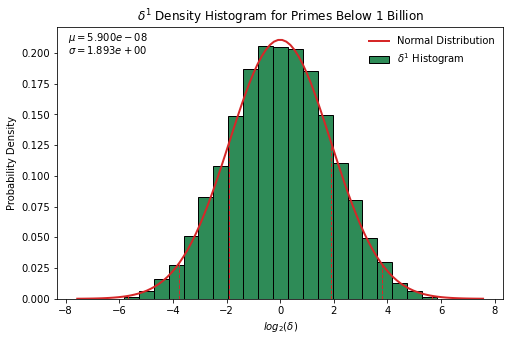

In [5]:
order = 1
figsize = (8, 5)
barplot_configs = {'color': 'seagreen',
                   'edgecolor':'black'}
plt.close()
fig = plt.gcf()
ax =plt.gca()
fig.set_size_inches(*figsize)
# Calculate bins and heights
data_num = df['frequency'].sum()
bins_num = bins_number_sturges(data_num)
bin_max = df['delta_log2'].max()
bin_min = df['delta_log2'].min()
bin_width = (bin_max-bin_min)/bins_num
bins = np.linspace(bin_min, bin_max, bins_num)
density = []
for i in range(1, bins_num):
    sub_df = df[(df['delta_log2']<bins[i]) & (df['delta_log2']>=bins[i-1])]
    density.append(sub_df['density'].sum()/bin_width)
density = np.array(density)
bar_width = (bin_max-bin_min)/(bins_num-1)

# Plot Histogram
plt.bar(bins[:-1], density,
        align='edge',
        width=bar_width,
        label=f'$\delta^{order}$ Histogram',
        linewidth=1,
        **barplot_configs)
# Plot Normal distribution
mean = (df['frequency']*df['delta_log2']).sum() / data_num
std = (((((df['delta_log2']-mean)**2)*df['frequency']).sum())/data_num)**0.5
x = np.linspace(-4*std, 4*std, 100)
y = normal_distribution(x, mean, std)
plt.plot(x, y,
        label='Normal Distribution',
        color='tab:red',
        linewidth=2)
# Plot vertical lines
vlines_x = [i*std for i in range(-3, 4) if i != 0]
ymaxs = [normal_distribution(i, mean, std) for i in vlines_x]
plt.vlines(vlines_x, ymin=0, ymax=ymaxs, color='tab:red', linewidth=1,
          linestyle='--')
# Extra configs
plt.title(f'$\delta^{order}$ Density Histogram for Primes Below 1 Billion')
plt.xlabel('$log_2(\delta)$')
plt.ylabel('Probability Density')
plt.legend(frameon=False)
text1 = f'$\sigma={std:.3e}$'
ax.text(0.025, 0.90, text1, color='black', transform=ax.transAxes)
text2 = f'$\mu={mean:.3e}$'
ax.text(0.025, 0.95, text2, color='black', transform=ax.transAxes)
plt.show()